![title](./../assets/1start.png)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.text as tfkpt
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
import json
from tensorflow.keras.models import model_from_json

In [2]:
anime_review_train = pd.read_csv('./../anime_scraper/more_anime_reviews.csv')


## Above read DATA scraped from CRUNCHYROLL for train reviews by **french_bread_webscraper**

In [3]:
anime_review_train.sample(10)

,show_title,review,rating,tags
4362,naruto,The Naruto series from the beginning to 220 is...,5.0,[]
3747,demon-slayer-kimetsu-no-yaiba,"I'm a massive fan of The Promised Neverland, a...",5.0,"['action', 'supernatural', 'drama']"
3565,that-time-i-got-reincarnated-as-a-slime,"When I saw this come out, I stayed away becaus...",5.0,"['fantasy', 'action', 'adventure', 'isekai', '..."
3083,jojos-bizarre-adventure,The day that I watched the first episode of th...,5.0,[]
1525,food-wars-shokugeki-no-soma,"(Spoilers included, please be advised)This ani...",5.0,"['action', 'adventure', 'comedy', 'shonen']"
2957,rezero-starting-life-in-another-world-,"Disclaimer, my opinion has been formed after w...",5.0,"['fantasy', 'adventure', 'action', 'comedy', '..."
720,black-clover,Like it the more I watched it. I think it dese...,4.0,"['fantasy', 'adventure', 'action', 'shonen', '..."
487,black-clover,If you're not a super nerd that writes 50 para...,5.0,"['fantasy', 'adventure', 'action', 'shonen', '..."
74,my-hero-academia,"I Buy The Manga, And oh boy, I wish i 'd woul...",5.0,"['action', 'fantasy', 'shonen', 'adventure']"
3267,jojos-bizarre-adventure,"This series is, in one word, amazing. I was no...",5.0,[]


In [4]:
ranked_anime_review = anime_review_train[['review', 'rating']].sort_values(by='rating')

In [5]:
ranked_anime_review

,review,rating
623,I will say that this series gets better as it ...,1.0
1094,This show for sure did start out rough..but no...,1.0
478,Most reviews about Black Clover that I've seen...,1.0
1097,Boruto could have been better if it wasn't a c...,1.0
900,after seeing 95 episodes i can finally say tha...,1.0
...,...,...
1995,This is a anime that sneaked up on me. I hear...,5.0
1996,"SAO, was a very good anime, it had lots of act...",5.0
1997,I had no idea what I was in for with this seri...,5.0
1891,"It took me a while, but I finally got into the...",5.0


In [6]:
regression_anime_review = ranked_anime_review['rating'].value_counts()

In [7]:
ra_review = ranked_anime_review.groupby(['rating'],as_index=False).count()
ra_review

,rating,review
0,1.0,231
1,2.0,161
2,3.0,167
3,3.5,66
4,4.0,365
5,4.5,348
6,5.0,3362


#### math calculation for the data range of positive, negative and neutral predictions

In [8]:
range = 50 - 10
range

40

In [9]:
round(range/3)

13

In [10]:
ra_review = ra_review.rename(columns={'rating': 'points', 'review': 'count'})


In [11]:
ra_review

,points,count
0,1.0,231
1,2.0,161
2,3.0,167
3,3.5,66
4,4.0,365
5,4.5,348
6,5.0,3362


In [12]:
X = ra_review['points'].values
y = ra_review['count'].values
X

array([1. , 2. , 3. , 3.5, 4. , 4.5, 5. ])

In [13]:
X=X.reshape(-1,1)
X

array([[1. ],
       [2. ],
       [3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=20)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4, 1)
y_train shape (4,)
X_test shape (3, 1)
y_test shape (3,)
[3362  231  161]


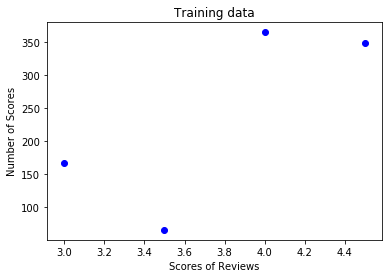

In [16]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Scores of Reviews' )
plt.ylabel('Number of Scores')
plt.title('Training data')
plt.show()

In [17]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 56.41 %
Test accuracy -30.96 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

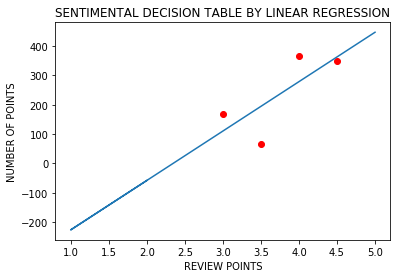

In [18]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY LINEAR REGRESSION")
plt.plot

#### We check it with Polynominal Regression

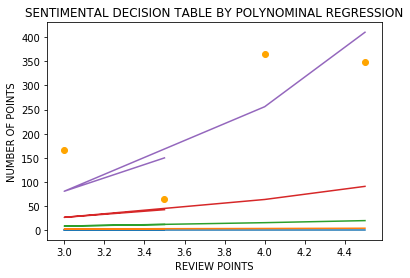

In [19]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY POLYNOMINAL REGRESSION")
plt.show()

In [20]:
def create_sentiment(int):
    if int >=1 and int<3:
        return 0
    if int>=3 and int<5:
        return 1
    if int>=5 and int<6:
        return 2

### Above the decision of breakpoints are given 

In [21]:
ranked_anime_review['sentiment'] = ranked_anime_review['rating'].apply(create_sentiment)

In [22]:
ranked_anime_review

,review,rating,sentiment
623,I will say that this series gets better as it ...,1.0,0
1094,This show for sure did start out rough..but no...,1.0,0
478,Most reviews about Black Clover that I've seen...,1.0,0
1097,Boruto could have been better if it wasn't a c...,1.0,0
900,after seeing 95 episodes i can finally say tha...,1.0,0
...,...,...,...
1995,This is a anime that sneaked up on me. I hear...,5.0,2
1996,"SAO, was a very good anime, it had lots of act...",5.0,2
1997,I had no idea what I was in for with this seri...,5.0,2
1891,"It took me a while, but I finally got into the...",5.0,2


In [23]:
def clean_text(str):
    return str.replace(',', ';')
                       

In [24]:
ranked_anime_review['review'] = ranked_anime_review['review'].apply(clean_text)

In [25]:
ranked_anime_review

,review,rating,sentiment
623,I will say that this series gets better as it ...,1.0,0
1094,This show for sure did start out rough..but no...,1.0,0
478,Most reviews about Black Clover that I've seen...,1.0,0
1097,Boruto could have been better if it wasn't a c...,1.0,0
900,after seeing 95 episodes i can finally say tha...,1.0,0
...,...,...,...
1995,This is a anime that sneaked up on me. I hear...,5.0,2
1996,SAO; was a very good anime; it had lots of act...,5.0,2
1997,I had no idea what I was in for with this seri...,5.0,2
1891,It took me a while; but I finally got into the...,5.0,2


In [26]:
ranked_anime_review.to_csv('final_review.csv')

In [27]:
review_df = pd.read_csv('final_review.csv')

In [28]:
review_df

,Unnamed: 0,review,rating,sentiment
0,623,I will say that this series gets better as it ...,1.0,0
1,1094,This show for sure did start out rough..but no...,1.0,0
2,478,Most reviews about Black Clover that I've seen...,1.0,0
3,1097,Boruto could have been better if it wasn't a c...,1.0,0
4,900,after seeing 95 episodes i can finally say tha...,1.0,0
...,...,...,...,...
4695,1995,This is a anime that sneaked up on me. I hear...,5.0,2
4696,1996,SAO; was a very good anime; it had lots of act...,5.0,2
4697,1997,I had no idea what I was in for with this seri...,5.0,2
4698,1891,It took me a while; but I finally got into the...,5.0,2


In [29]:
review_df.columns=['Unnamed: 0', 'review' , 'rating' , 'sentiment']
review_training_df = review_df[['review', 'sentiment']].dropna()
review_training_df.sample(5)

,review,sentiment
2957,Im just like the rest complaining about the fi...,2
3441,My hero academia (at least the first season; a...,2
2624,Demon Slayer lives up to the hype with vivid c...,2
2127,What I love about this anime (besides the fant...,2
413,At first it was ehh; then it was starting to g...,1


In [30]:
review_y = review_training_df.sentiment
print(review_y)

0       0
1       0
2       0
3       0
4       0
       ..
4695    2
4696    2
4697    2
4698    2
4699    2
Name: sentiment, Length: 4700, dtype: int64


In [31]:
review_x = review_training_df.review
print(review_x)

0       I will say that this series gets better as it ...
1       This show for sure did start out rough..but no...
2       Most reviews about Black Clover that I've seen...
3       Boruto could have been better if it wasn't a c...
4       after seeing 95 episodes i can finally say tha...
                              ...                        
4695    This is a anime that sneaked up on me.  I hear...
4696    SAO; was a very good anime; it had lots of act...
4697    I had no idea what I was in for with this seri...
4698    It took me a while; but I finally got into the...
4699    Alot of action from the start; but the protago...
Name: review, Length: 4700, dtype: object


In [32]:
review_training_df.describe()

,sentiment
count,4700.000000
mean,1.631915
std,0.632054
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_x)

In [34]:
review_x = tokenizer.texts_to_sequences(review_x)

In [35]:
review_x = tokenizer.sequences_to_matrix(review_x)
review_x

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [36]:
print(type(review_x))

<class 'numpy.ndarray'>


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


In [38]:
print ("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [39]:
review_y = keras.utils.to_categorical(review_y,3)

In [40]:
review_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

![title](./../assets/1reg.png)

#### x and y axis created for machine learning, now it is time for layers between input and output

![title](./../assets/1sent.png)

In [41]:
model = Sequential()

#### 1st layer act Sigmoid drop 1 at 10%

In [42]:
model.add(Dense(755, activation='sigmoid'))
model.add(Dropout(0.1))

#### 2nd layer act Rectified Linear Drop 1 at 20%

In [43]:
model.add(Dense(555, activation = 'relu'))
model.add(Dropout(0.2))

#### 3rd layer act Linear Drop 1 at 40%

In [44]:
model.add(Dense(333, activation = 'linear'))
model.add(Dropout(0.40))

#### 4th layer act softsign no drop

In [45]:
model.add(Dense(33, activation = 'softsign'))


#### 5th layer act softmax no drop

In [46]:
model.add(Dense(3, activation = 'softmax'))

#### Compile the model

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model.fit(
    review_x, review_y,
    batch_size=35,
    epochs=7,
    verbose=1,
    validation_split=0.2)

Train on 3760 samples, validate on 940 samples
Epoch 1/7
3760/3760 [==============================] - 10s 3ms/sample - loss: 0.8878 - accuracy: 0.6399 - val_loss: 0.4247 - val_accuracy: 1.0000
Epoch 2/7
3760/3760 [==============================] - 9s 2ms/sample - loss: 0.8674 - accuracy: 0.6441 - val_loss: 0.4953 - val_accuracy: 1.0000
Epoch 3/7
3760/3760 [==============================] - 9s 2ms/sample - loss: 0.8614 - accuracy: 0.6463 - val_loss: 0.3745 - val_accuracy: 0.9894
Epoch 4/7
3760/3760 [==============================] - 9s 2ms/sample - loss: 0.6872 - accuracy: 0.7066 - val_loss: 1.0996 - val_accuracy: 0.4681
Epoch 5/7
3760/3760 [==============================] - 9s 2ms/sample - loss: 0.4359 - accuracy: 0.8247 - val_loss: 1.0967 - val_accuracy: 0.4532
Epoch 6/7
3760/3760 [==============================] - 9s 2ms/sample - loss: 0.2255 - accuracy: 0.9194 - val_loss: 1.5105 - val_accuracy: 0.5234
Epoch 7/7
3760/3760 [==============================] - 8s 2ms/sample - loss: 0.117

In [49]:
final_model_1 = model.to_json()
with open('final_model_1.json', 'w') as json_file:
    json_file.write(final_model_1)
model.save_weights('final_model_1.h5')

In [50]:
final_dict_1 = tokenizer.word_index
with open('final_dict_1.json', 'w') as d:
    json.dump(final_dict_1, d)

In [51]:
tokenizer = Tokenizer(num_words=22454)

In [52]:
labels = ['negative', 'natural', 'positive']

In [53]:
with open('final_dict_1.json', 'r') as dictionary_file:
    dictionary = json.load(dictionary_file)

In [54]:
def convert_text_to_index_array(text):
    words = tfkpt.text_to_word_sequence(text)
    testArr = []
    for word in words:
        if word in dictionary:
            testArr.append(dictionary[word])
        else:
            print("'%s' is not related with an anime," %(word))
            
    return testArr

In [55]:
json_file = open('final_model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [56]:
model = model_from_json(loaded_model_json)

In [57]:
model.load_weights('final_model_1.h5')

In [ ]:
evalSentence = input('Tell me your idea, Enter to quit: ')


        

In [ ]:
testArr = convert_text_to_index_array(evalSentence)
print(evalSentence)

In [ ]:
input = tokenizer.sequences_to_matrix([testArr], mode='binary')

In [ ]:
pred = model.predict(input)
print(input)
print(testArr)
print(model)

print(testArr)
print('*******',pred)


In [ ]:
print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)]* 100))